# PH2255 Week 19. Statistical Data Analysis 3

Generic Python header: here the interactive/inline plotting style is selected, relevant libraries are imported, python2/3 compatibility is addressed.

In [6]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

# Exercise 3. Analysis of refraction data from Ptolemy

The astronomer Claudius Ptolemy performed experiments on the refraction of light using a circular copper disc
submerged to its centre in water:
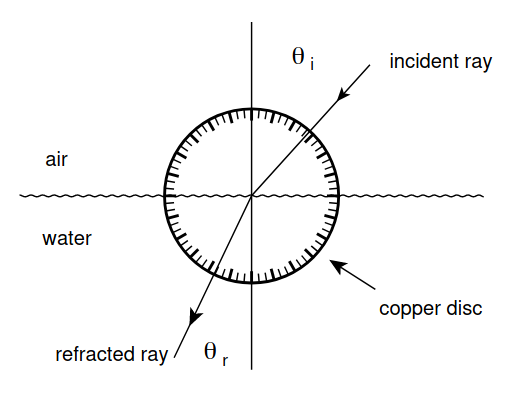

Angles of refraction $\theta_r$ for 8 values of the angle of incidence $\theta_i$ obtained by Ptolemy around 140 A.D.
are given in the Table 2 (reproduced from Glen Cowan's "Introduction to Statistic Methods"):

For purposes of this exercise we will take the angles of incidence to be known with negligible error and treat
the angles of reflection as independent Gaussian-distributed measurements with standard deviations of $\sigma=\frac{1}{2}^\circ$.
(This is a reasonable guess given that the angles are reported to the nearest half degree.
Note that we can absorb an error in $\theta_i$ into an effective error in $\theta_r$.)

In this exercise you will need to input the data into Python yourself.
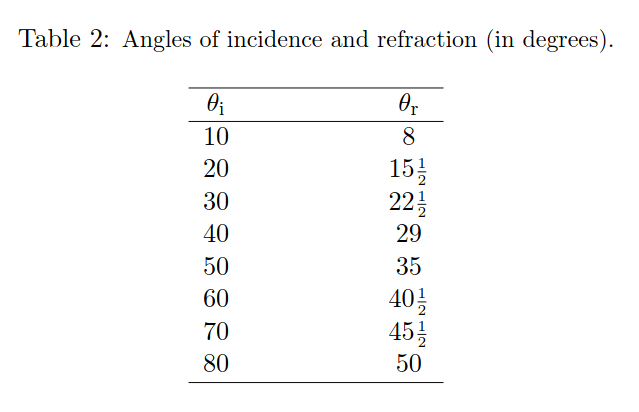

In [8]:
# Define the data set

inc = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
ref = np.array([8.0,  15.5, 22.5, 29.0, 35.0, 40.5, 45.5, 50.0])
sig = np.array([0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])


**Report the parameter estimates, their standard deviations, and where relevant the covariance matrix for all of the fits below.
Make plots of the fitted curves and the data.**

## Exercise 3(a)
Until the discovery of the correct law of refraction (see below), a commonly used hypothesis was
$$\theta_r = \alpha\theta_i,$$
although it is reported that Ptolemy preferred the formula
$$\theta_r = \alpha\theta_i - \beta\theta_i^2.$$
Find the least-squares estimates of the parameters for both hypotheses and determine the minimized $\chi^2$.
Comment on the goodness-of-fit for both hypotheses.
Is it plausible that all of the data values are based on actual measurements?

In [13]:
# Exercise 3a

# Define Hypotheses

def h1(inc, *vars):
    a, = vars
    return a*inc

def h2(inc, *vars):
    a, b = vars
    return a*inc - b*inc**2

# Curve fitting

p0_1 = np.array([1.0])
p0_2 = np.array([1.0, 1.0])

params_1, covariance_1 = curve_fit(h1, inc, ref, p0_1, sig, absolute_sigma=True)
params_2, covariance_2 = curve_fit(h2, inc, ref, p0_2, sig, absolute_sigma=True)

# Parameter standard deviation

params_1_std_dev = np.sqrt(np.diag(covariance_1))
params_2_std_dev = np.sqrt(np.diag(covariance_2))

# Plotting

fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot()
ax1.set_title('first hypothesis ($\\alpha \theta_i$) fit')
ax2 = fig2.add_subplot()
ax2.set_title('second hypothesis ($\\alpha \theta_i+\\beta \theta_i^2$) fit')
ax1.set_ylabel("$\theta_r$")
ax2.set_ylabel("$\theta_r$")
ax1.set_xlabel("$\theta_i$")
ax2.set_xlabel("$\theta_i$")

inc_val = np.arange(0, 90, 1)

def std_dev(inc, cov): return np.sqrt(sum([(inc**(i+j))*cov[i][j] for i in range(len(cov)) for j in range(len(cov))]))

## Given Data
ax1.errorbar(inc, ref, yerr=sig, fmt='kx', label="test data")
ax2.errorbar(inc, ref, yerr=sig, fmt='kx', label="test data")

## Plot the two fits
ax1.plot(inc_val, h1(inc_val, params_1), 'r', label="first hypothesis fit")
#ax1.fill_between(h_val, fit1(h_val, theta_hat_1)-std_dev(h_val, covariance_1), fit1(h_val, theta_hat_1)+std_dev(h_val, covariance_1), label="one standard deviation")
ax1.legend()

plt.show()



## Exercise 3(b)
The law of refraction discovered by the Persian mathematician and physicist Ibn Sahl
in the 10th century and rediscovered by others including Snell in 1621 is
$$\theta_r = \sin^{-1} \bigg(\frac{\sin \theta_i}{r}\bigg),$$
where $r=n_r/n_i$ is the ratio of indices of refraction of the two media.

Determine the least-squares estimate for $r$ and find value of the minimized $\chi^2$.
Comment on the validity of assumption that $\sigma = \frac{1}{2}^\circ$.

Suggestions: `np.sin(x)` returns $\sin x$ for angle $x$ measured in radians;
`np.arcsin(y)` returns $\sin^{-1}y$ in radians;
`np.deg2rad(x)` and `np.rad2deg(x)` convert between degrees and radians. All these functions
correctly handle `np.array` arguments.

In [4]:
# Exercise 3b




***
26/01/2021. This Jupyter notebook was assembled by Lev Levitin based on the course written by Glen Cowan.